In [ ]:
#Combining each tweet .json file into .csv file
'''
import pandas as pd
import glob
import json
files = glob.glob('*')
#files = glob.glob('user/*')
len(files)
dictlist = []

for file in files:
    json_string = open(file,encoding="utf8").read()
    json_dict = json.loads(json_string)
    dictlist.append(json_dict)
    
df = pd.DataFrame(dictlist)

df = df.replace({'\n': ' '}, regex=True) # remove linebreaks in the dataframe
df = df.replace({'\t': ' '}, regex=True) # remove tabs in the dataframe
df = df.replace({'\r': ' '}, regex=True) # remove carriage return in the dataframe
df
df.to_csv("data.csv")
'''

In [33]:
#importing libraries
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [21]:
df_original=pd.read_csv('tweet_dataset.csv')
pd.set_option('display.max_colwidth', 100)
df_original.head()

C:\Users\fcc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,7,9,10,11,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,is_reply,is_retweet,user_id,has_media,medias,Unnamed: 14,Unnamed: 15
0,0,rj_ashwin,1.243960e+18,"Sabse Pehle toh Majdur , Labour Class, Worker,kehna band Karo Unhe Tum Kya ho jo 'Work from h...",/rj_ashwin/status/1243959777266286593,0,1,0,2020-03-28 23:24:57,False,False,2898096642,NaN,NaN,NaN,NaN
1,1,vikramsoni232,1.244163e+18,@ TajinderBagga Bhaiya i proud of you. You are real hero in delhi in #lockdown21 You moral ...,/vikramsoni232/status/1244163016012075008,0,0,0,2020-03-29 12:52:33,False,False,291596567,NaN,NaN,NaN,NaN
2,2,ABHISHE33329022,1.244291e+18,Mam India mein hum ko company's ki audit krni chiye.wo labour ko pay kre lock down ki salary...,/ABHISHE33329022/status/1244290847236972544,0,0,0,2020-03-29 21:20:30,True,False,1244169861946699776,NaN,NaN,NaN,NaN
3,3,hindust74474485,1.253172e+18,Videsh me rahne wale Bhai India laye Gaye but Jo log India me hi dusre state me fase huye h ...,/hindust74474485/status/1253171675081904129,0,0,0,2020-04-23 09:29:44,False,False,1252876822687019009,NaN,NaN,NaN,NaN
4,4,KumarSa61420257,1.254602e+18,Akhir bhojh ban gaye na bihari pure India pe. Students bhi and Labour bhi.Jab bihari majdur...,/KumarSa61420257/status/1254602420426063872,0,0,0,2020-04-27 08:15:01,False,False,991231687341195266,NaN,NaN,NaN,NaN


In [22]:
df_clean = df_original.drop(['Unnamed: 0','Unnamed: 14','Unnamed: 15','medias','has_media','user_id','url','ID'], axis=1)
df_clean.rename(columns={'text':'Tweets'}, inplace=True)
print(df_clean.shape)
df_clean.head()

(74809, 8)


,usernameTweet,Tweets,nbr_retweet,nbr_favorite,nbr_reply,datetime,is_reply,is_retweet
0,rj_ashwin,"Sabse Pehle toh Majdur , Labour Class, Worker,kehna band Karo Unhe Tum Kya ho jo 'Work from h...",0,1,0,2020-03-28 23:24:57,False,False
1,vikramsoni232,@ TajinderBagga Bhaiya i proud of you. You are real hero in delhi in #lockdown21 You moral ...,0,0,0,2020-03-29 12:52:33,False,False
2,ABHISHE33329022,Mam India mein hum ko company's ki audit krni chiye.wo labour ko pay kre lock down ki salary...,0,0,0,2020-03-29 21:20:30,True,False
3,hindust74474485,Videsh me rahne wale Bhai India laye Gaye but Jo log India me hi dusre state me fase huye h ...,0,0,0,2020-04-23 09:29:44,False,False
4,KumarSa61420257,Akhir bhojh ban gaye na bihari pure India pe. Students bhi and Labour bhi.Jab bihari majdur...,0,0,0,2020-04-27 08:15:01,False,False


In [23]:
#Remove Punctuation

def remove_punc(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation]) #Removing punctuations in the text
    return text_nopunct

df_clean['Tweets'] = df_clean['Tweets'].apply(lambda x: remove_punc(x))

In [24]:
df_clean.head()

,usernameTweet,Tweets,nbr_retweet,nbr_favorite,nbr_reply,datetime,is_reply,is_retweet
0,rj_ashwin,Sabse Pehle toh Majdur Labour Class Workerkehna band Karo Unhe Tum Kya ho jo Work from home ...,0,1,0,2020-03-28 23:24:57,False,False
1,vikramsoni232,TajinderBagga Bhaiya i proud of you You are real hero in delhi in lockdown21 You moral and...,0,0,0,2020-03-29 12:52:33,False,False
2,ABHISHE33329022,Mam India mein hum ko companys ki audit krni chiyewo labour ko pay kre lock down ki salary ...,0,0,0,2020-03-29 21:20:30,True,False
3,hindust74474485,Videsh me rahne wale Bhai India laye Gaye but Jo log India me hi dusre state me fase huye h ...,0,0,0,2020-04-23 09:29:44,False,False
4,KumarSa61420257,Akhir bhojh ban gaye na bihari pure India pe Students bhi and Labour bhiJab bihari majdur ...,0,0,0,2020-04-27 08:15:01,False,False


In [26]:
# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df_clean['Subjectivity'] = df_clean['Tweets'].apply(getSubjectivity)
df_clean['Polarity'] = df_clean['Tweets'].apply(getPolarity)

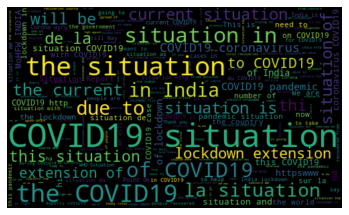

In [37]:
# Plot the Word Cloud
allWords = ' '.join(twts for twts in df_clean['Tweets'])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [38]:
#Create a function to compute negative, neutral and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df_clean['Analysis'] = df_clean['Polarity'].apply(getAnalysis)

In [39]:
df_clean.head()

,usernameTweet,Tweets,nbr_retweet,nbr_favorite,nbr_reply,datetime,is_reply,is_retweet,Subjectivity,Polarity,Analysis
0,rj_ashwin,Sabse Pehle toh Majdur Labour Class Workerkehna band Karo Unhe Tum Kya ho jo Work from home ...,0,1,0,2020-03-28 23:24:57,False,False,0.000000,0.000000,Neutral
1,vikramsoni232,TajinderBagga Bhaiya i proud of you You are real hero in delhi in lockdown21 You moral and...,0,0,0,2020-03-29 12:52:33,False,False,0.404167,0.258333,Positive
2,ABHISHE33329022,Mam India mein hum ko companys ki audit krni chiyewo labour ko pay kre lock down ki salary ...,0,0,0,2020-03-29 21:20:30,True,False,0.288889,-0.155556,Negative
3,hindust74474485,Videsh me rahne wale Bhai India laye Gaye but Jo log India me hi dusre state me fase huye h ...,0,0,0,2020-04-23 09:29:44,False,False,0.000000,0.000000,Neutral
4,KumarSa61420257,Akhir bhojh ban gaye na bihari pure India pe Students bhi and Labour bhiJab bihari majdur ...,0,0,0,2020-04-27 08:15:01,False,False,0.500000,0.214286,Positive


In [60]:
# tweets=['test']
# dict = {'Tweets':tweets}
# positive_tweets = pd.DataFrame(dict)
# positive_tweets.to_csv('Positive_tweets.csv')

In [61]:
# pt = pd.read_csv('Positive_tweets.csv')

In [62]:
# Print and save all of the positive tweets
# j=1
# sortedDF = df_clean.sort_values(by=['Polarity'])


# for i in range(0, sortedDF.shape[0]):
#    if(sortedDF['Analysis'][i]=='Positive'):
#        pt['Tweets'][i] = sortedDF['Tweets'][i]
#        j=j+1

C:\Users\fcc\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
# pt = pd.read_csv('Positive_tweets.csv')
# pt.head()

In [1]:
# Plot the polarity and subjectivity

plt.figure(figsize=(8,6))
plt.scatter(df_clean['Polarity'], df_clean['Subjectivity'], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

NameError: name 'plt' is not defined

In [13]:
#Tokenization

def tokenization(text):
    text_token = re.split('\W+',text) #Returns a match where the string does contain only word characters
    return text_token
df_clean['text'] = df_clean['text'].apply(lambda x: tokenization(x.lower()))

In [14]:
#Remove Stopwords

stopword =nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text_sp = [words for words in text if words not in stopword]
    return text_sp
df_clean['text'] = df_clean['text'].apply(lambda x: remove_stopwords(x))